In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv")

# Rename columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('st', 'state')

# Renaming columns with typos
df.rename(columns={'custateomer': 'customer', 
                   'custateomer_lifetime_value': 'customer_lifetime_value'}, 
          inplace=True)

df

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#cleaning the data

df['gender'] = df['gender'].replace({"Femal": "F", "Male": "M", "female": "F"})


state_mapping = {"AZ": "Arizona", "Cali": "California", "WA": "Washington"}
df['state'] = df['state'].replace(state_mapping)


df['education'] = df['education'].replace({"Bachelors": "Bachelor"})


df['customer_lifetime_value'] = df['customer_lifetime_value'].str.replace('%', '')


vehicle_mapping = {"Sports Car": "Luxury", "Luxury SUV": "Luxury", "Luxury Car": "Luxury"}
df['vehicle_class'] = df['vehicle_class'].replace(vehicle_mapping)


In [3]:
# Convert customer lifetime value to float
df['customer_lifetime_value'] = df['customer_lifetime_value'].astype(float)

# Number of open complaints 
df['number_of_open_complaints'] = df['number_of_open_complaints'].str.split('/').str[1].astype(float)


In [4]:
# Identify columns with null values
null_columns = df.columns[df.isnull().any()]
null_count = df[null_columns].isnull().sum()

# Fill null values (using median for numerical variables and mode for categorical as an example)
for column in null_columns:
    if df[column].dtype == 'float64':
        df[column].fillna(df[column].median(), inplace=True)
    else:
        df[column].fillna(df[column].mode()[0], inplace=True)

# Convert all numeric variables to integers
df = df.applymap(lambda x: int(x) if isinstance(x, float) else x)


In [5]:
# Drop duplicates and reset index
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

df.to_csv('cleaned_data.csv', index=False)


In [6]:
# Read in the datasets
df_file1 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv")
df_file2 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2_clean.csv")
df_file3 = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3_clean.csv")

# Combining the data
customer_data = pd.concat([df_file1, df_file2, df_file3], ignore_index=True)

customer_data.columns = map(str.lower, customer_data.columns)

# Rename the columns 
rename_columns = {
    'customer': 'customer_id',
    'st': 'state',
    'gender': 'gender',
    'education': 'education',
    'customer lifetime value': 'customer_lifetime_value',
    'income': 'income',
    'monthly premium auto': 'monthly_premium_auto',
    'number of open complaints': 'number_of_open_complaints',
    'policy type': 'policy_type',
    'vehicle class': 'vehicle_class',
    'total claim amount': 'total_claim_amount'
}

customer_data.rename(columns=rename_columns, inplace=True)

customer_data

,customer_id,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
28151,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
28152,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
28153,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
28154,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


In [7]:
marketing_data = pd.read_csv('https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv')


In [8]:
#cleaning the data

marketing_data.drop(columns=['unnamed:_0'], inplace=True)
marketing_data.columns = marketing_data.columns.str.lower()
missing_data = marketing_data.isnull().sum()
print(missing_data[missing_data > 0])
marketing_data['effective_to_date'] = pd.to_datetime(marketing_data['effective_to_date'])
marketing_data.drop_duplicates(inplace=True)

marketing_data

Series([], dtype: int64)


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,64195,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [9]:
# Merging the two dataframes 
merged_data = pd.merge(marketing_data, customer_data, left_on='customer', right_on='customer_id', how='inner')

#pivot table
pivot_revenue = merged_data.pivot_table(values='monthly_premium_auto_x', index='sales_channel', aggfunc='sum')
pivot_revenue = pivot_revenue.sort_values(by='monthly_premium_auto_x', ascending=False)
print(pivot_revenue)


               monthly_premium_auto_x
sales_channel                        
Agent                          790025
Branch                         570875
Call Center                    397928
Web                            306305


In [10]:
#separating numerical and categorical
numerical = merged_data.select_dtypes(include=[np.number])
categorical = merged_data.select_dtypes(include=[object])

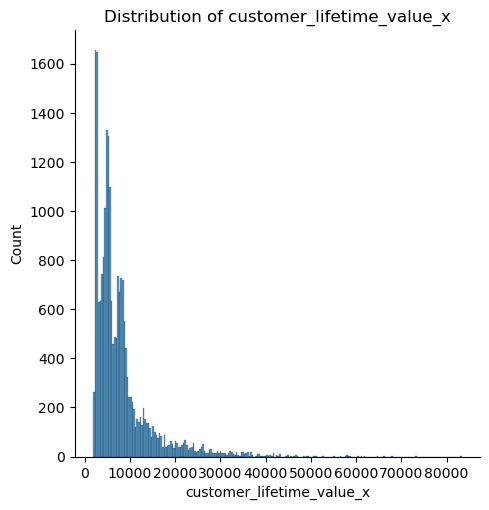

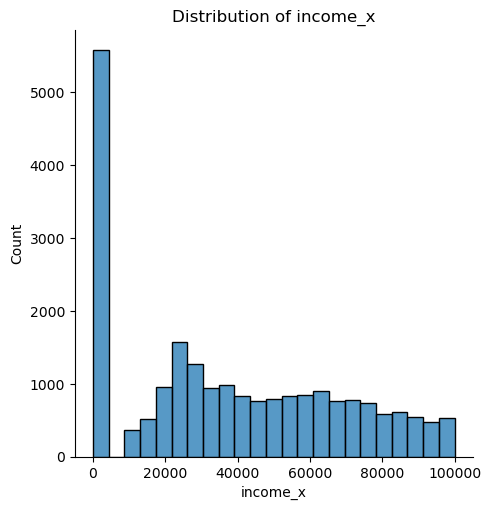

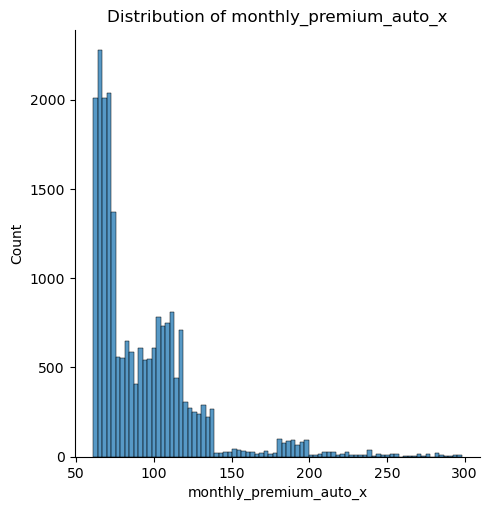

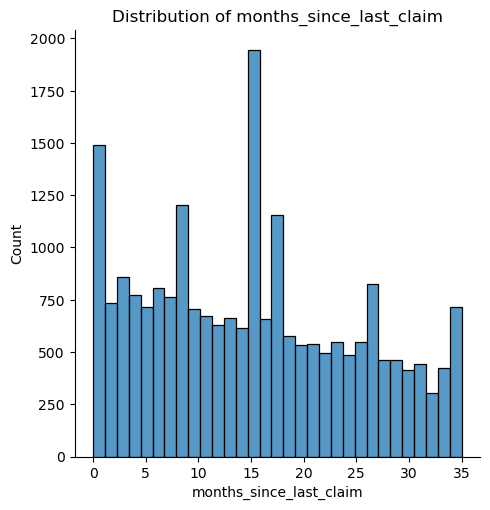

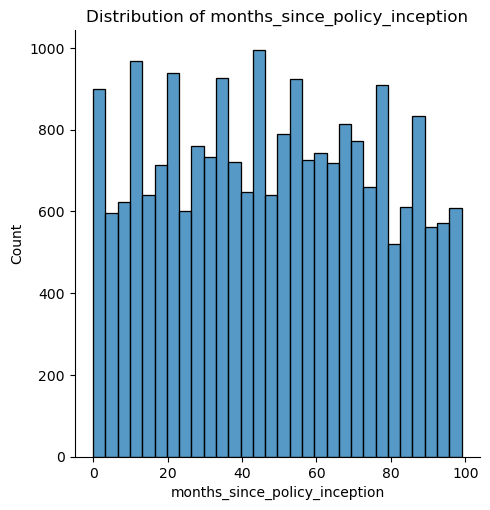

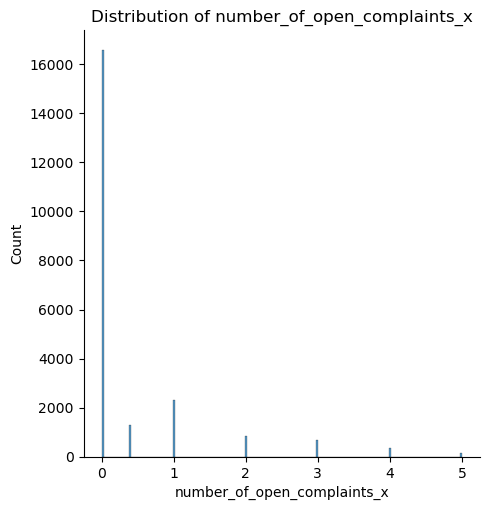

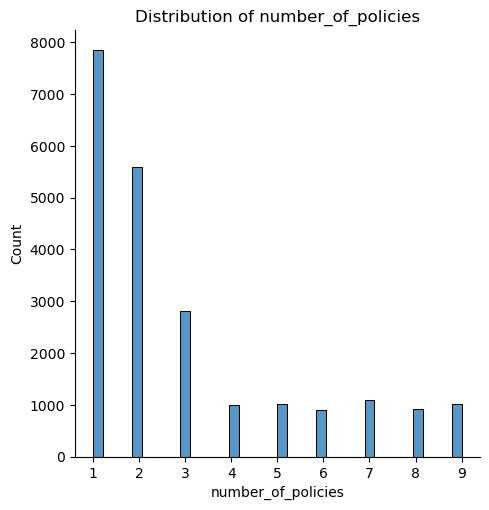

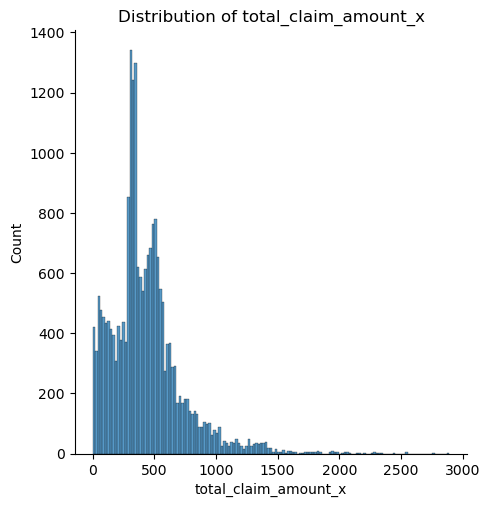

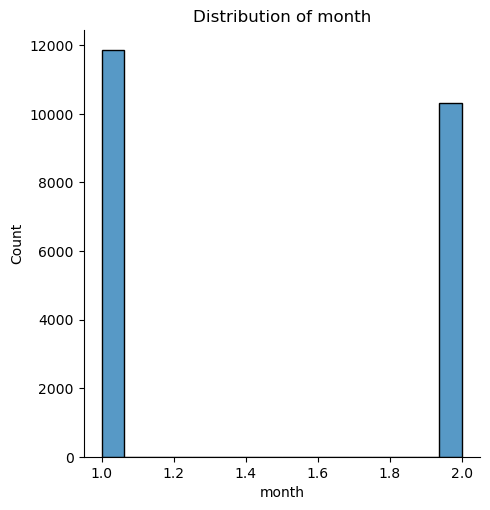

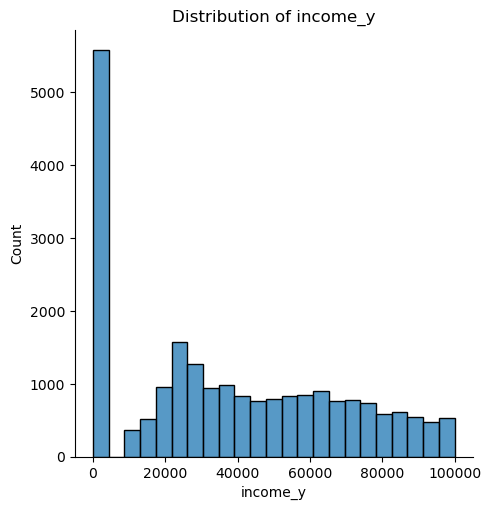

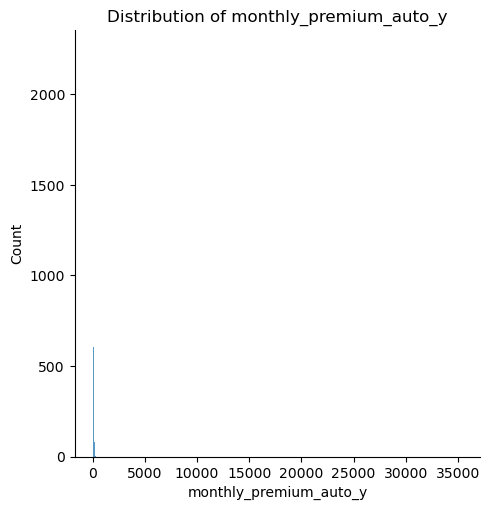

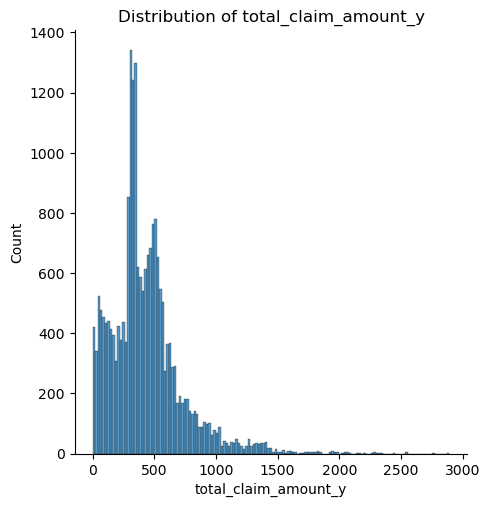

In [11]:
#plotting all numerical data into graphs
for column in numerical:
    sns.displot(numerical[column])
    plt.title(f"Distribution of {column}")
    plt.show()

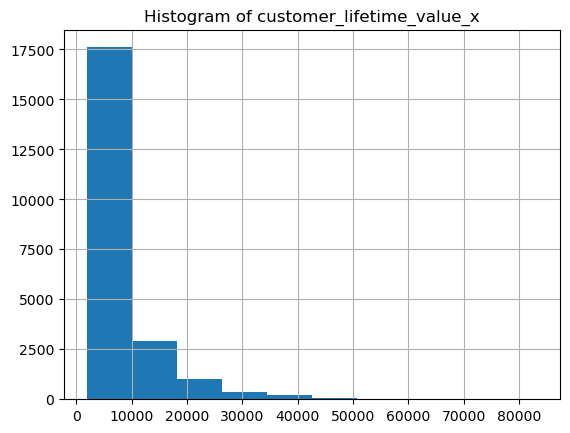

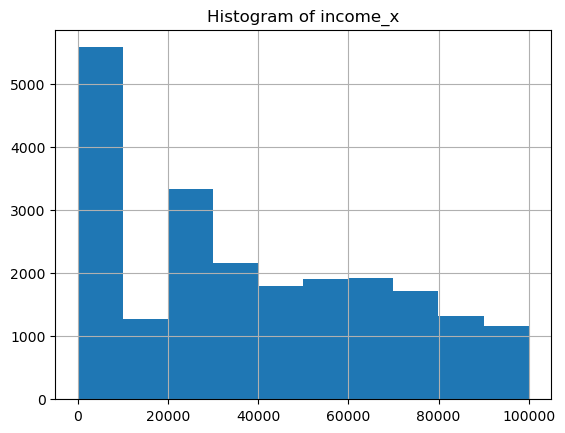

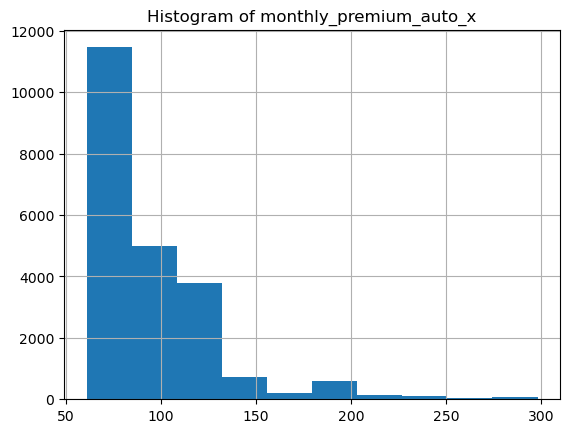

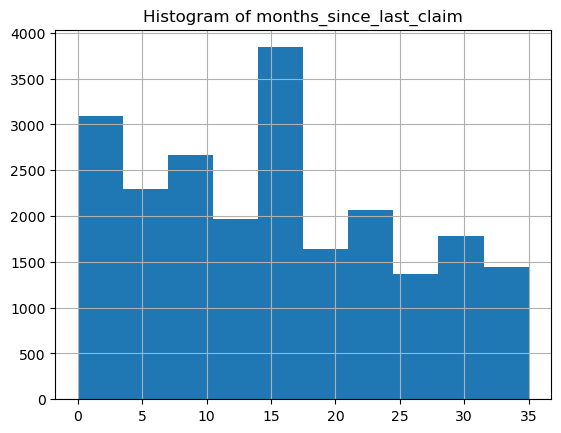

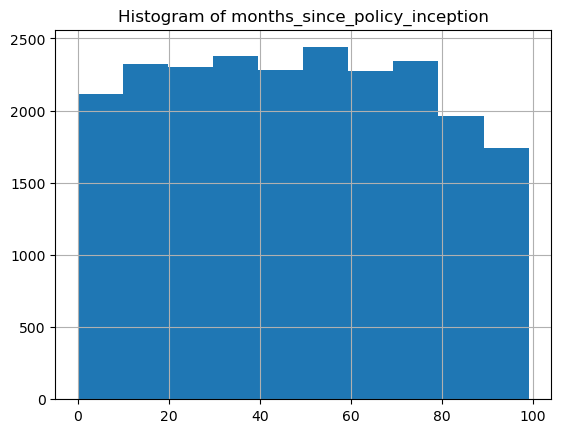

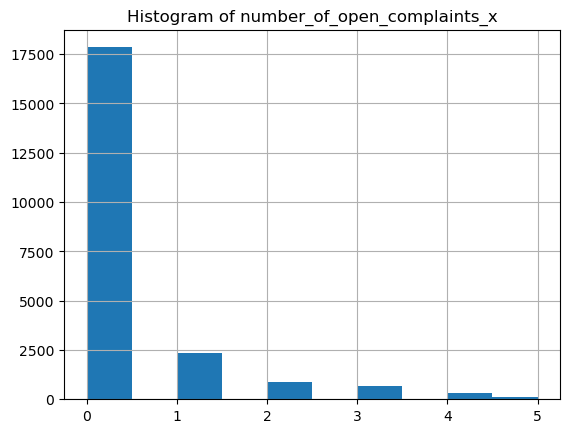

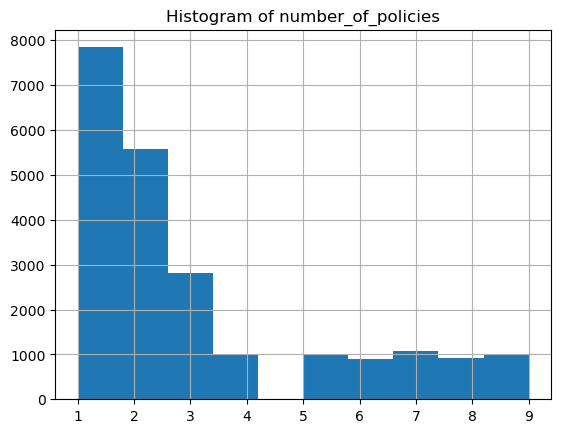

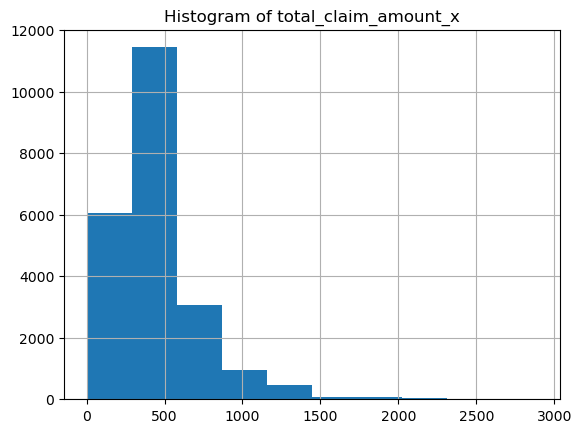

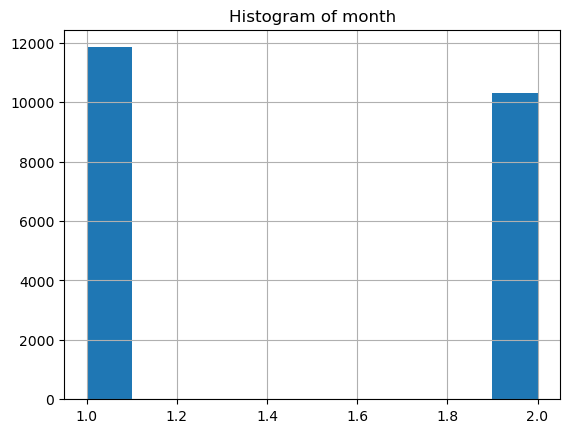

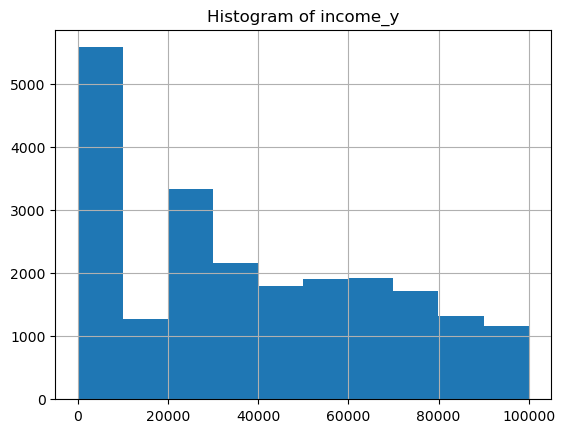

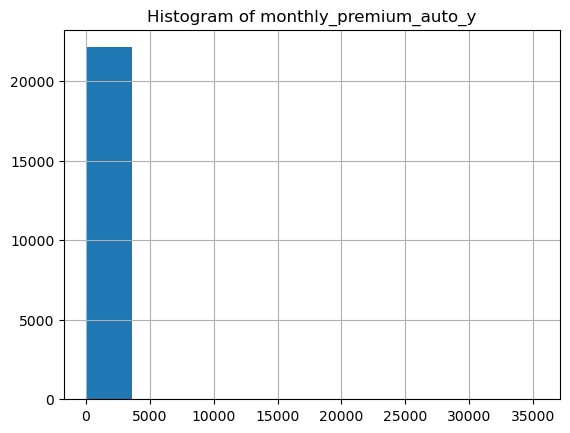

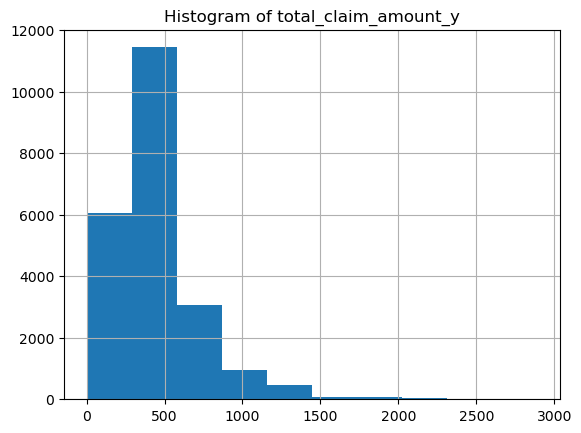

In [12]:
#making a histogram
for column in numerical:
    numerical[column].hist()
    plt.title(f"Histogram of {column}")
    plt.show()

In [13]:
#correlational matric 
correlation_matrix = numerical.drop(columns="total_claim_amount_x").corr()


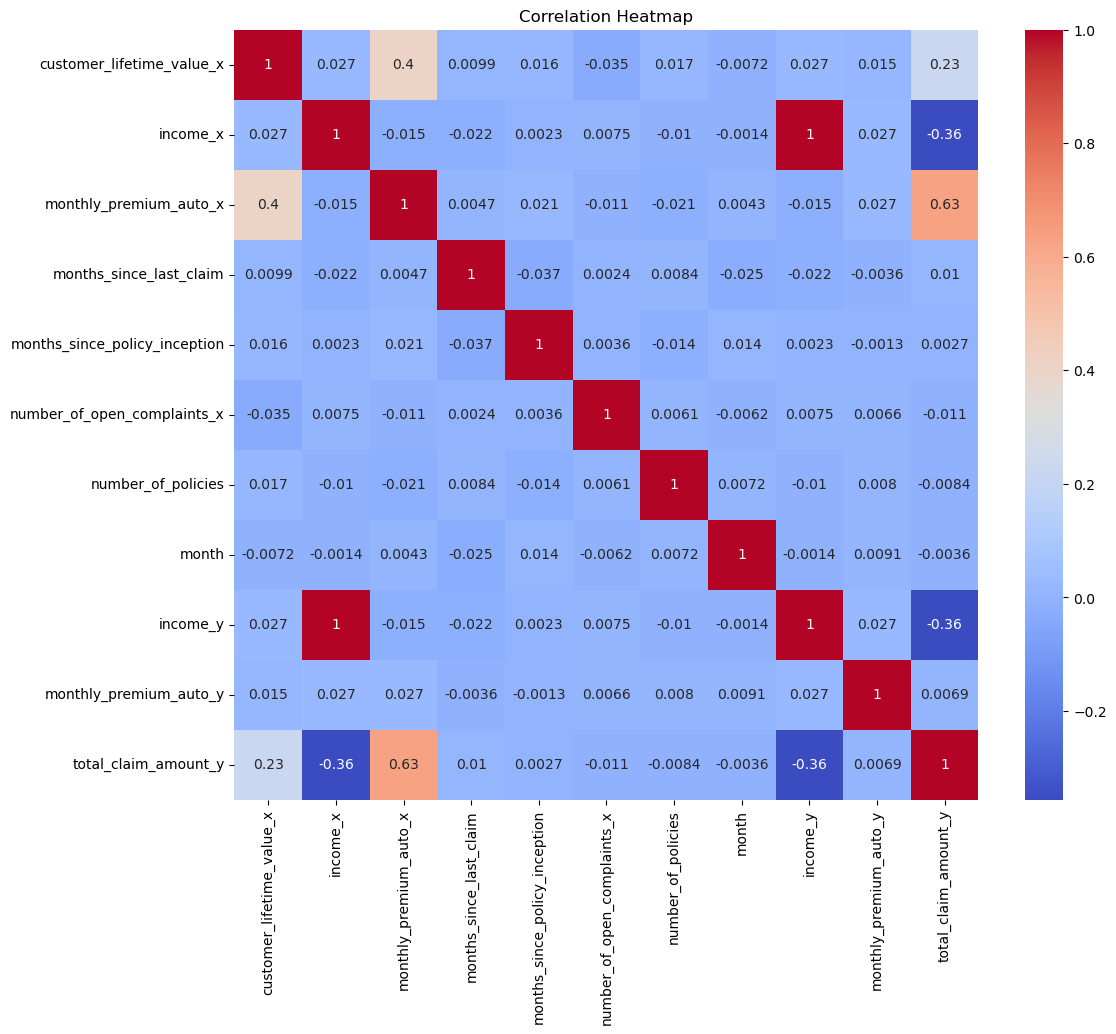

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


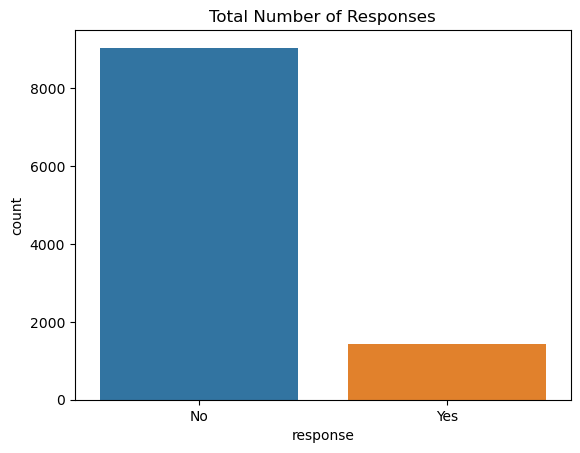

In [15]:
sns.countplot(x='response', data=marketing_data)
plt.title("Total Number of Responses")
plt.show()


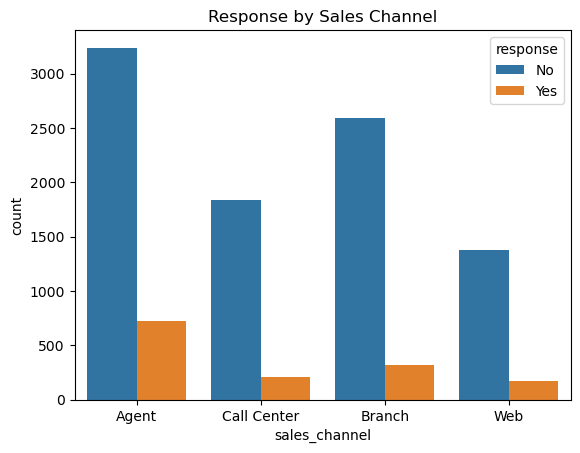

In [16]:
sns.countplot(x='sales_channel', hue='response', data=marketing_data)
plt.title("Response by Sales Channel")
plt.show()


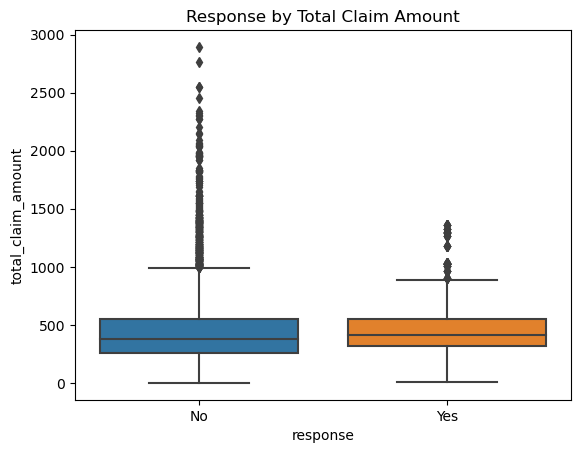

In [17]:
sns.boxplot(x='response', y='total_claim_amount', data=marketing_data)
plt.title("Response by Total Claim Amount")
plt.show()


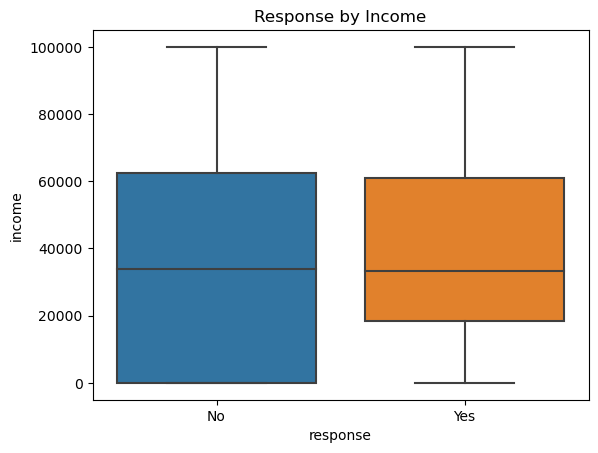

In [18]:
sns.boxplot(x='response', y='income', data=marketing_data)
plt.title("Response by Income")
plt.show()


